# 可视化关键点检测数据集标注

同济子豪兄 2023-4-23

分析样例图像和样例labelme标注文件，解析出：框、关键点、多段线三种标注，并可视化。

## 导入工具包

In [153]:
import cv2
import numpy as np
import json

import matplotlib.pyplot as plt
%matplotlib inline

## 载入图像

In [154]:
img_path = '1.jpg'

In [155]:
img_bgr = cv2.imread(img_path)

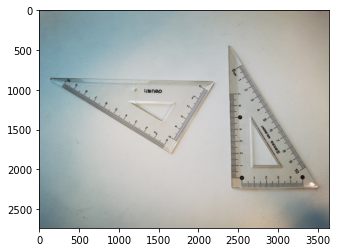

In [129]:
plt.imshow(img_bgr[:,:,::-1])
plt.show()

## 载入labelme格式的json标注文件

In [156]:
labelme_path = '1_labelme.json'

In [157]:
with open(labelme_path, 'r', encoding='utf-8') as f:
    labelme = json.load(f)

## 查看标注信息

In [132]:
labelme.keys()

dict_keys(['version', 'flags', 'shapes', 'imagePath', 'imageData', 'imageHeight', 'imageWidth'])

In [158]:
labelme['shapes']

[{'label': 'sjb_rect',
  'points': [[132.82352941176498, 829.764705882353],
   [2209.294117647059, 1818.0000000000002]],
  'group_id': None,
  'shape_type': 'rectangle',
  'flags': {}},
 {'label': 'sjb_rect',
  'points': [[2368.117647058824, 429.7647058823531],
   [3524.0, 2273.8823529411766]],
  'group_id': None,
  'shape_type': 'rectangle',
  'flags': {}},
 {'label': 'angle_30',
  'points': [[153.4117647058826, 862.1176470588236]],
  'group_id': None,
  'shape_type': 'point',
  'flags': {}},
 {'label': 'angle_30',
  'points': [[2391.6470588235297, 450.3529411764707]],
  'group_id': None,
  'shape_type': 'point',
  'flags': {}},
 {'label': 'angle_60',
  'points': [[2194.588235294118, 897.4117647058824]],
  'group_id': None,
  'shape_type': 'point',
  'flags': {}},
 {'label': 'angle_60',
  'points': [[3500.470588235294, 2218.0]],
  'group_id': None,
  'shape_type': 'point',
  'flags': {}},
 {'label': 'angle_90',
  'points': [[1665.1764705882354, 1797.4117647058824]],
  'group_id': None

## 可视化框（rectangle）标注

### 框的可视化配置

In [159]:
# 框（rectangle）可视化配置
bbox_color = (255, 129, 0)           # 框的颜色
bbox_thickness = 5                   # 框的线宽

# 框类别文字
bbox_labelstr = {
    'font_size':6,         # 字体大小
    'font_thickness':14,   # 字体粗细
    'offset_x':0,          # X 方向，文字偏移距离，向右为正
    'offset_y':-80,       # Y 方向，文字偏移距离，向下为正
}

### 画框

In [135]:
for each_ann in labelme['shapes']: # 遍历每一个标注
    
    if each_ann['shape_type'] == 'rectangle': # 筛选出框标注
        
        # 框的类别
        bbox_label = each_ann['label'] 
        # 框的两点坐标
        bbox_keypoints = each_ann['points'] 
        bbox_keypoint_A_xy = bbox_keypoints[0]
        bbox_keypoint_B_xy = bbox_keypoints[1]
        # 左上角坐标
        bbox_top_left_x = int(min(bbox_keypoint_A_xy[0], bbox_keypoint_B_xy[0]))
        bbox_top_left_y = int(min(bbox_keypoint_A_xy[1], bbox_keypoint_B_xy[1]))
        # 右下角坐标
        bbox_bottom_right_x = int(max(bbox_keypoint_A_xy[0], bbox_keypoint_B_xy[0]))
        bbox_bottom_right_y = int(max(bbox_keypoint_A_xy[1], bbox_keypoint_B_xy[1]))
        
        # 画矩形：画框
        img_bgr = cv2.rectangle(img_bgr, (bbox_top_left_x, bbox_top_left_y), (bbox_bottom_right_x, bbox_bottom_right_y), bbox_color, bbox_thickness)
        
        # 写框类别文字：图片，文字字符串，文字左上角坐标，字体，字体大小，颜色，字体粗细
        img_bgr = cv2.putText(img_bgr, bbox_label, (bbox_top_left_x+bbox_labelstr['offset_x'], bbox_top_left_y+bbox_labelstr['offset_y']), cv2.FONT_HERSHEY_SIMPLEX, bbox_labelstr['font_size'], bbox_color, bbox_labelstr['font_thickness'])
        

### 可视化

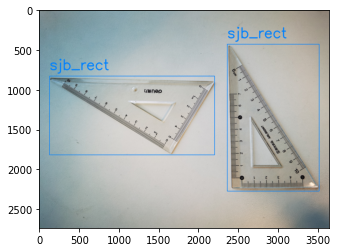

In [136]:
plt.imshow(img_bgr[:,:,::-1])
plt.show()

## 可视化关键点（keypoint）标注

### 关键点的可视化配置

In [137]:
# 关键点配色
kpt_color_map = {
    'angle_30':{'id':0, 'color':[255,0,0], 'radius':30, 'thickness':-1},
    'angle_60':{'id':1, 'color':[0,255,0], 'radius':30, 'thickness':-1},
    'angle_90':{'id':2, 'color':[0,0,255], 'radius':30, 'thickness':-1}
}

# 点类别文字
kpt_labelstr = {
    'font_size':4,             # 字体大小
    'font_thickness':12,       # 字体粗细
    'offset_x':30,             # X 方向，文字偏移距离，向右为正
    'offset_y':100,            # Y 方向，文字偏移距离，向下为正
}

### 画点

In [138]:
for each_ann in labelme['shapes']: # 遍历每一个标注
    
    if each_ann['shape_type'] == 'point': # 筛选出关键点标注
        
        kpt_label = each_ann['label'] # 该点的类别
        
        # 该点的 XY 坐标
        kpt_xy = each_ann['points'][0]
        kpt_x, kpt_y = int(kpt_xy[0]), int(kpt_xy[1])
        
        # 该点的可视化配置
        kpt_color = kpt_color_map[kpt_label]['color']         # 颜色
        kpt_radius = kpt_color_map[kpt_label]['radius']       # 半径
        kpt_thickness = kpt_color_map[kpt_label]['thickness'] # 线宽（-1代表填充）
        
        # 画圆：画该关键点
        img_bgr = cv2.circle(img_bgr, (kpt_x, kpt_y), kpt_radius, kpt_color, kpt_thickness)
        
        # 写该点类别文字：图片，文字字符串，文字左上角坐标，字体，字体大小，颜色，字体粗细
        img_bgr = cv2.putText(img_bgr, kpt_label, (kpt_x+kpt_labelstr['offset_x'], kpt_y+kpt_labelstr['offset_y']), cv2.FONT_HERSHEY_SIMPLEX, kpt_labelstr['font_size'], kpt_color, kpt_labelstr['font_thickness'])
        

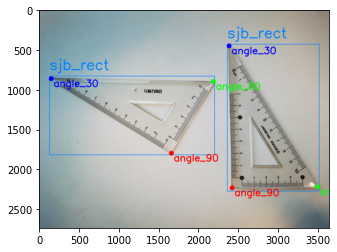

In [139]:
plt.imshow(img_bgr[:,:,::-1])
plt.show()

## 可视化多段线（poly）标注

### 多段线的可视化配置

In [140]:
poly_color = (151, 57, 224)
poly_thickness = 3

poly_labelstr = {
    'font_size':4,          # 字体大小
    'font_thickness':12,    # 字体粗细
    'offset_x':-200,        # X 方向，文字偏移距离，向右为正
    'offset_y':0,           # Y 方向，文字偏移距离，向下为正
}

### 画多段线

In [141]:
img_mask = np.ones(img_bgr.shape, np.uint8)

for each_ann in labelme['shapes']: # 遍历每一个标注
    
    if each_ann['shape_type'] == 'polygon': # 筛选出多段线（polygon）标注
        
        poly_label = each_ann['label'] # 该多段线的类别
        
        poly_points = [np.array(each_ann['points'], np.int32).reshape((-1, 1, 2))] # 该多段线每个点的坐标

        # 该多段线平均 XY 坐标，用于放置多段线类别文字
        x_mean = int(np.mean(poly_points[0][:,0,:][:,0]))
        y_mean = int(np.mean(poly_points[0][:,0,:][:,1]))
        
        # 画该多段线轮廓
        img_bgr = cv2.polylines(img_bgr, poly_points, isClosed=True, color=poly_color, thickness=poly_thickness)
        
        # 画该多段线内部填充
        img_mask = cv2.fillPoly(img_mask, poly_points, color=poly_color)
        
        # 写该多段线类别文字：图片，文字字符串，文字左上角坐标，字体，字体大小，颜色，字体粗细
        img_bgr = cv2.putText(img_bgr, poly_label, (x_mean+poly_labelstr['offset_x'], y_mean+poly_labelstr['offset_y']), cv2.FONT_HERSHEY_SIMPLEX, poly_labelstr['font_size'], poly_color, poly_labelstr['font_thickness'])
        

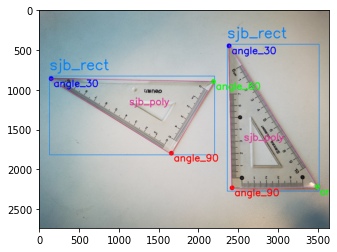

In [142]:
plt.imshow(img_bgr[:,:,::-1])
plt.show()

### 可视化多段线填充

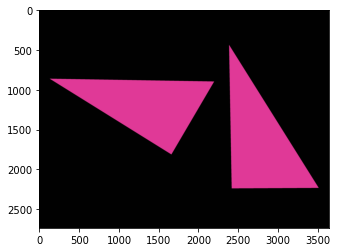

In [143]:
# 多段线内部填充效果
plt.imshow(img_mask[:,:,::-1])
plt.show()

In [144]:
opacity = 0.9 # 透明度，越大越接近原图
img_bgr = cv2.addWeighted(img_bgr, opacity, img_mask, 1-opacity, 0)

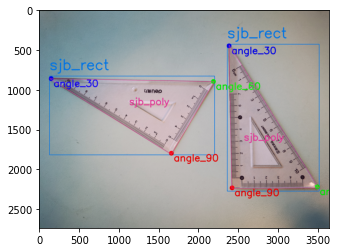

In [145]:
plt.imshow(img_bgr[:,:,::-1])
plt.show()

## 保存可视化结果

In [146]:
cv2.imwrite('visualize.jpg', img_bgr)

True